<a href="https://colab.research.google.com/github/nicolezhu2020/covid-19-data/blob/master/HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2.1 Image classification using logistic regression on MNIST data in Tensorflow Keras framework

In this homework, we will load handwritten digits data MNIST and build a logistic regression model using Tensorflow Keras framework to classify the digits.

You may run this on your local laptop or you can upload it to run it on Google Colab cloud. Either way, you will still submit your homework through github. If you use your own laptop, you would just need to install tensorflow first. See https://canvas.tufts.edu/courses/54565/pages/resources .

If you need to refresh your Keras documentation, refer to:
- https://keras.io/guides/sequential_model/
- https://keras.io/guides/training_with_built_in_methods/


## 1. Getting data and inspect the data

### loading data

In [ ]:

from tensorflow.keras.datasets import mnist
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


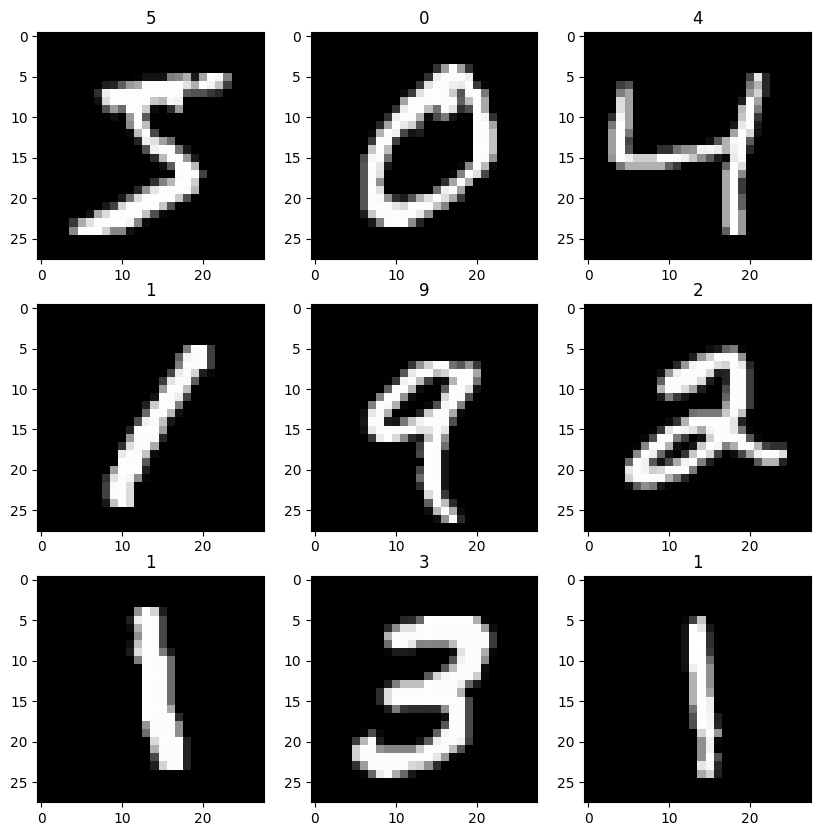

In [ ]:
# show some images
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches(10, 10)
for i in range(9):
  plt.subplot(3, 3, i+1)
  axis = plt.gca()
  axis.set_title(str(training_dataset_y[i]))
  plt.imshow(training_dataset_x[i].reshape(28, 28), cmap='gray')
plt.show()

### write code to inspect to data and answer the following question:

1. What is the data type of `training_dataset_x` and `training_dataset_y`?
2. What is the dimension of `training_dataset_x` and `training_dataset_y`? How about `test_dataset_x`, `test_dataset_y`? Explain why the data and the label are in this shape respectively. This is just for you to understand the data set and the labels/classes.
3. What is the min and max values of the pixels of the images? (hint: you can inspect several elements of the `training_data_x`) You can assume all images in this data have the same range of values.

In [ ]:
# YOUR CODE HERE
print("training_dataset_x data type is", training_dataset_x.dtype)
print("training_dataset_y data type is", training_dataset_y.dtype)

print("Dimension of training_dataset_x:", training_dataset_x.shape)
print("Dimension of training_dataset_y:", training_dataset_y.shape)
print("Dimension of test_dataset_x:", test_dataset_x.shape)
print("Dimension of test_dataset_y:", test_dataset_y.shape)
# when we split the data into training and testing, we split the whole dataset into two parts. Then for each training and testing in x, y, depending on the
# same number of samples, we split the label and features, so the number of samples will remain constant between x and y.
print("Min pixel value:", training_dataset_x.min())
print("Max pixel value:", training_dataset_x.max())



training_dataset_x data type is uint8
training_dataset_y data type is uint8
Dimension of training_dataset_x: (60000, 28, 28)
Dimension of training_dataset_y: (60000,)
Dimension of test_dataset_x: (10000, 28, 28)
Dimension of test_dataset_y: (10000,)
Min pixel value: 0
Max pixel value: 255


### massage the data

We need to do the following data manipulation in order to prepare the data to feed into the model. Write code for:

1. <b>Flatten each image into 1-d array</b>. The images come in 2-d array (such as x by y, where `x==y==28`), but the logistic regression needs a 1-d input. Let's flatten the images into a 1-d array of z, where `z=x*y`, using the reshape function of numpy.
2. <b>Normalization</b>. The images' pixel values come in with a big range as you see above. ML models usually trains better if the input values are constrained in a small range with a nice distribution. In this case, let's divide all the pixel values by the max value you found above. What is the resulting range of values for this data?
3. <b>Convert labels to catgorical data</b>. You have seen above that the labels (`training_dataset_y` and `test_dataset_y`) comes in as integers, but we want to convert them to one-hot encodings. Let's use this function from tensorflow:

```python
from tensorflow.keras.utils import to_categorical
training_dataset_y = to_categorical(training_dataset_y)
```

You can apply it to test labels too. After you did both, inspect the shapes again. What do you see?

In [ ]:
# YOUR CODE HERE
# flatten
training_dataset_x_flattened = training_dataset_x.reshape(training_dataset_x.shape[0], 28*28)
test_dataset_x_flattened = test_dataset_x.reshape(test_dataset_x.shape[0], 28*28)
# normalization
training_dataset_x_normalized = training_dataset_x_flattened / 255.0
test_dataset_x_normalized = test_dataset_x_flattened / 255.0
# convert labels to categorical data
from tensorflow.keras.utils import to_categorical
training_dataset_y_categorical = to_categorical(training_dataset_y)
test_dataset_y_categorical = to_categorical(test_dataset_y)

# inspect the sahpes
print("Shape of training_dataset_x_normalized:", training_dataset_x_normalized.shape)
print("Shape of test_dataset_x_normalized:", test_dataset_x_normalized.shape)
print("Shape of training_dataset_y_categorical:", training_dataset_y_categorical.shape)
print("Shape of test_dataset_y_categorical:", test_dataset_y_categorical.shape)

# the features shape changed since we convert to 1-d array, which is 28*28
# the label shape changed too, since the MNIST dataset consists of handwritten digits from 0 to 9, which means there are 10 classes.


Shape of training_dataset_x_normalized: (60000, 784)
Shape of test_dataset_x_normalized: (10000, 784)
Shape of training_dataset_y_categorical: (60000, 10)
Shape of test_dataset_y_categorical: (10000, 10)


## 2. Build a logistic regression model

Recall that the multinomial logistic regression shown in the following figure consists of two layers: an input layer and an output layer, connected with a weight matrix W.

<img src="logistic.png" alt="logisticRegression" width="400"/>

In our current image classification task, the input features are just the pixel values. Write the code to build such a logistic regression model in Keras with two layers. First create a `Sequential` model. The input layer can be ommited, so all you need to do is to add a `Dense` layer (output layer) with the number of notes equal to the number of classes. When adding this layer, you need to specify the number of output classes, input dimension of the image (one image), and activation function of the output shown in the picture above (note that there is no non-linear layers in this model so you shouldn't use a non-linear activation). Something like this:

```python
Dense(num_output, input_dim, activation)
```

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

model = Sequential()
# add dense layer (see above comments)
# YOUR CODE HERE
num_classes = 10 # (0-9)
input_dim = 28*28
model.add(Dense(num_classes, input_dim=input_dim, activation='softmax'))

# compile model with adam optimizer, categorical_crossentropy loss, and add 'categorical_accuracy' to the metrics
# YOUR CODE HERE
# import adam
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=keras.optimizers.Adam(),  # Using keras to specify the optimizer
              loss='categorical_crossentropy',    # Loss function for multi-class classification
              metrics=['categorical_accuracy'])

# print out a model summary
# YOUR CODE HERE
model.summary()

# train model
# change the data to prepared data
history = model.fit(training_dataset_x_normalized, training_dataset_y_categorical, epochs=10, batch_size=64, validation_split=0.2)
# YOUR CODE HERE
test_loss, test_acc = model.evaluate(test_dataset_x_normalized, test_dataset_y_categorical, verbose=2)
print('\nTest accuracy:', test_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6143 - categorical_accuracy: 0.8442 - val_loss: 0.3523 - val_categorical_accuracy: 0.9064
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3454 - categorical_accuracy: 0.9047 - val_loss: 0.3042 - val_categorical_accuracy: 0.9164
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3105 - categorical_accuracy: 0.9139 - val_loss: 0.2866 - val_categorical_accuracy: 0.9194
Epoch 4/10
750/750 [==============================

### Add tensorboard to keep track of your training

Documentation: https://keras.io/api/callbacks/tensorboard/

You can add tensorboard, a visualization tool for monitoring your training.

Add this and train again:

```python
tb_callback = keras.callbacks.TensorBoard('./logs', update_freq=1)

hist = model.fit(training_dataset_x, training_dataset_y, epochs=10, batch_size=64,
validation_split=0.2,callbacks=[tb_callback])
```
What happens here is a callback, which is an action that the training will perform at a certain point. In this case, Tensorflow will write the record of the training to the directory `./logs` every epoch.

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import TensorBoard
tb_callback = TensorBoard(log_dir='./logs', update_freq=1)
# use normalized and flattened dataset
history = model.fit(
    training_dataset_x_normalized,
    training_dataset_y_categorical,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[tb_callback]
)

# calculate the accuracy
test_loss, test_accuracy = model.evaluate(
    test_dataset_x_normalized,
    test_dataset_y_categorical,
    verbose=2
)
print('\nTest accuracy:', test_accuracy)




Epoch 1/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2582 - categorical_accuracy: 0.9287 - val_loss: 0.2606 - val_categorical_accuracy: 0.9293
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2562 - categorical_accuracy: 0.9288 - val_loss: 0.2630 - val_categorical_accuracy: 0.9283
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2538 - categorical_accuracy: 0.9292 - val_loss: 0.2596 - val_categorical_accuracy: 0.9302
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2522 - categorical_accuracy: 0.9299 - val_loss: 0.2649 - val_categorical_accuracy: 0.9277
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2505 - categorical_accuracy: 0.9314 - val_loss: 0.2588 - val_categorical_accuracy: 0.9307
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2497 - categorical_accuracy: 0.9304 - val_loss: 0.2606 - val_categorical_accuracy: 0.9300
Epoc

## 3. Evaluate the trained model

Reference the following code for testing your model on the test data.

In [ ]:
eval_result = model.evaluate(test_dataset_x_normalized, test_dataset_y_categorical)
for i in range(len(eval_result)):
  print(f'{model.metrics_names[i]} ---> {eval_result[i]}')

313/313 [==============================] - 0s 933us/step - loss: 0.2652 - categorical_accuracy: 0.9278
loss ---> 0.26517435908317566
categorical_accuracy ---> 0.9277999997138977


## 4. Turn this model into a neural network

In the above implementation of logistic regression, the one `Desnse` layer you added basically can be considered the output layer of a neural network. Let's turn this into an actual neural netowrk by adding another "hidden" `Dense` layer before the output layer:

- You should specify the input dimension in this hidden layer and remove `input_dim` from the output layer;
- The hidden layer should have activation function of non-linearity, such as "relu";
- You can specify the dimension (number of units) in this hidden layer as 256 (but you can pick any number you like);
- Then you can keep the output layer similar to the logistic regression `Dense` layer above (remember it should not have the argument `input_dim`)

In [ ]:
# add hidden dense layer (non-linear layer)
# YOUR CODE HERE
num_classes = 10
input_dim = 784
model = Sequential()

# add hidden dense layer with relu
model.add(Dense(256, activation='relu', input_shape=(input_dim,))) # first layer
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# summry the model
model.summary()

# train the model
history = model.fit(training_dataset_x_normalized, training_dataset_y_categorical, epochs=10, batch_size=64, validation_split=0.2)

# get the accuracy
test_loss, test_accuracy = model.evaluate(test_dataset_x_normalized, test_dataset_y_categorical, verbose=2)
print('\nTest accuracy:', test_accuracy)

# The accuracy improve to 98%


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2462 - accuracy: 0.9281 - val_loss: 0.1252 - val_accuracy: 0.9610
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0977 - accuracy: 0.9712 - val_loss: 0.0934 - val_accuracy: 0.971

This is basically a neural network model now. Print a model summary, what do you see? Train the model to see how well it performs.

Then, try adding another hidden layer and retrain the model, report the results.

In [ ]:
# YOUR CODE HERE
num_classes = 10
input_dim = 784
model = Sequential()

# add hidden dense layer with relu
model.add(Dense(256, activation='relu', input_shape=(input_dim,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu')) # add one more layer
model.add(Dense(num_classes, activation='softmax'))

#compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# summry the model
model.summary()

# train the model
history = model.fit(training_dataset_x_normalized, training_dataset_y_categorical, epochs=10, batch_size=64, validation_split=0.2)

# get the accuracy
test_loss, test_accuracy = model.evaluate(test_dataset_x_normalized, test_dataset_y_categorical, verbose=2)
print('\nTest accuracy:', test_accuracy)

# after adding one more layer, it seems like the accuracy didn't improve


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 335114 (1.28 MB)
Trainable params: 335114 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2417 - accuracy: 0.9279 - val_loss: 0.1315 - val_accuracy: 0.9601
Epoch 2/